# Comment Volume Prediction using Neural Networks and Decision Trees

Ekaterina Pogrebnyakova

In the beginning we import data set and external module with utility functions and other code in our notebook.

In [1]:
import ep
import numpy as np
import os
import pandas as pd
from sklearn import linear_model, tree
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
import time
import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import datetime
import matplotlib.pyplot as plt


np.random.seed(123)

C:\Users\Sun\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
baseDir = "C:/Users/Sun/Desktop/UofT/3253/Final Project/Dataset"
trainFile1 = os.path.join(baseDir, "Training", "Features_Variant_1.csv")
trainFile2 = os.path.join(baseDir, "Training", "Features_Variant_2.csv")
trainFile3 = os.path.join(baseDir, "Training", "Features_Variant_3.csv")
trainFile4 = os.path.join(baseDir, "Training", "Features_Variant_4.csv")
trainFile5 = os.path.join(baseDir, "Training", "Features_Variant_5.csv")
testFile1 = os.path.join(baseDir, "Testing/TestSet", "Test_Case_1.csv")
testFile2 = os.path.join(baseDir, "Testing/TestSet", "Test_Case_2.csv")
testFile3 = os.path.join(baseDir, "Testing/TestSet", "Test_Case_3.csv")
testFile4 = os.path.join(baseDir, "Testing/TestSet", "Test_Case_4.csv")
testFile5 = os.path.join(baseDir, "Testing/TestSet", "Test_Case_5.csv")
testFile6 = os.path.join(baseDir, "Testing/TestSet", "Test_Case_6.csv")
testFile7 = os.path.join(baseDir, "Testing/TestSet", "Test_Case_7.csv")
testFile8 = os.path.join(baseDir, "Testing/TestSet", "Test_Case_8.csv")
testFile9 = os.path.join(baseDir, "Testing/TestSet", "Test_Case_9.csv")
testFile10 = os.path.join(baseDir, "Testing/TestSet", "Test_Case_10.csv")

## Lasso

We can start from Lasso and decision Tree Regressors. Also we use RandomizeSearchSV on hyper parameters

In [3]:
cols = ['Regressor','Training Set','Test Set','Best Parameters', 'Time Train', 'HITS@10', 'AUC@10','MAE']
df_scores = pd.DataFrame(columns = cols)

lasso_param =  {'alpha': [0.5,1,2,5,10],
               'fit_intercept': [True, False]}

tree_param = {'max_depth': np.arange(3, 10),
             'min_samples_split': [25, 50, 75, 100,150],
             'min_samples_leaf':[25, 50, 75, 100,150],
             'max_leaf_nodes':[25,50,75,100,150]}

reg_name = ['Lasso Regression', 'Decision Tree Regressor']
regressors =[linear_model.Lasso(), tree.DecisionTreeRegressor()]
params = [lasso_param, tree_param]

for k in range(len(regressors)):
    print(reg_name[k]) 
    for i in range(1,6):
        train_file = os.path.join(baseDir, "Training", "Features_Variant_" + str(i) + ".csv")
        for j in range(1,11):
            scal = StandardScaler()
            test_file = os.path.join(baseDir, "Testing/TestSet", "Test_Case_" + str(j) + ".csv")
        # train
            x_train, y_train = ep.GetXYsFromFile(train_file)
            x_test, y_test = ep.GetXYsFromFile(test_file)
            x_train = scal.fit_transform(x_train)
            x_test = scal.transform(x_test)
            t0 = time.time()
           
            grid = False
            best_param, y_pred = ep.GetBestParams_train(regressors[k], params[k], x_train, y_train, x_test, y_test, grid = grid)
            t1 = time.time()
        # HITS@10
            y_pred_10, y_test_10 = ep.set_10(y_test,y_pred)
            dif = ep.hits_10(y_pred_10, y_test_10)
            #print("Training set: %i, test set: %i, HITS@10: %s" % (i, j, "{:.1f}".format(dif))) #y_10))
        # AUC@10
            AUC_10 = ep.AUC(y_pred_10, y_test_10)
            #print("Training set: %i, test set: %i, AUC@10: %f" % (i, j, AUC_10))
        # Calculate MAE
            MAE = mean_absolute_error(y_test, y_pred)
            #print("Training set: %i, test set: %i, MAE: %f" % (i, j, MAE))
        # time taken
            time_dif = (t1 - t0)
            print("Training set: %i, test set: %i, time %s" % (i, j, time_dif))
        #make dataFrame with results
            dict_score = pd.Series({ 
                     'Regressor': reg_name[k],
                     'Training Set' : i,
                     'Test Set': j,
                     'Best Parameters':  best_param,
                     'Time Train': time_dif,
                     'HITS@10': dif,
                     'AUC@10': AUC_10,
                     'MAE': MAE},
                )
            
            df_scores = df_scores.append(dict_score, ignore_index = True)
# save output to file
nowStr = datetime.datetime.now().strftime("%Y%m%d-%H%M")
df_scores.to_csv(os.path.join(baseDir, "%s-output-%s.csv" % ('-'.join(reg_name), nowStr)))

print("Done.")

Decision Tree Regressor
Training set: 1, test set: 1, time 15.18267560005188
Training set: 1, test set: 2, time 17.293338298797607
Training set: 1, test set: 3, time 17.40504813194275
Training set: 1, test set: 4, time 16.93216586112976
Training set: 1, test set: 5, time 15.681071043014526
Training set: 1, test set: 6, time 17.802337408065796
Training set: 1, test set: 7, time 21.028737545013428
Training set: 1, test set: 8, time 15.099181413650513
Training set: 1, test set: 9, time 15.333420753479004
Training set: 1, test set: 10, time 14.832432985305786
Training set: 2, test set: 1, time 25.97110915184021
Training set: 2, test set: 2, time 30.430747985839844
Training set: 2, test set: 3, time 31.313257932662964
Training set: 2, test set: 4, time 28.47432255744934
Training set: 2, test set: 5, time 32.625489950180054
Training set: 2, test set: 6, time 27.886959552764893
Training set: 2, test set: 7, time 30.99550461769104
Training set: 2, test set: 8, time 28.969874382019043
Training 

In [63]:
#df_scores.to_csv(os.path.join(baseDir, "lasso-decision-output-20180408-2149.csv"))

## Random Forest Regressor

Random Forest is an ensemble of Decisiion Trees and instead of searching for the very best feature it searches for the best feature among a random subset of features.

In [5]:
cols = ['Regressor','Training Set','Test Set','Best Parameters', 'Time Train', 'HITS@10', 'AUC@10','MAE']
df_scores_rf = pd.DataFrame(columns = cols)
reg_name = 'RF'
 
for i in range(1,6):
    train_file = os.path.join(baseDir, "Training", "Features_Variant_" + str(i) + ".csv")
    for j in range(1,11):
        scal = StandardScaler()
        test_file = os.path.join(baseDir, "Testing/TestSet", "Test_Case_" + str(j) + ".csv")
    # train
        x_train, y_train = ep.GetXYsFromFile(train_file)
        x_test, y_test = ep.GetXYsFromFile(test_file)
        x_train = scal.fit_transform(x_train)
        x_test = scal.transform(x_test)
        t0 = time.time()
        regr = RandomForestRegressor(n_estimators = 25, max_depth = 9, min_samples_split = 50, min_samples_leaf = 50, n_jobs = -1)
        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        t1 = time.time()
    # HITS@10
        y_pred_10, y_test_10 = ep.set_10(y_test,y_pred)
        dif = ep.hits_10(y_pred_10, y_test_10)
        #print("Training set: %i, test set: %i, HITS@10: %s" % (i, j, "{:.1f}".format(dif))) #y_10))
    # AUC@10
        AUC_10 = ep.AUC(y_pred_10, y_test_10)
        #print("Training set: %i, test set: %i, AUC@10: %f" % (i, j, AUC_10))
    # Calculate MAE
        MAE = mean_absolute_error(y_test, y_pred)
        #print("Training set: %i, test set: %i, MAE: %f" % (i, j, MAE))
    # time taken
        time_dif = (t1 - t0)
        print("Training set: %i, test set: %i, time %s" % (i, j, time_dif))
    #make dataFrame with results
        dict_score_rf = pd.Series({ 
                 'Regressor': 'Random Forest Regressor',
                 'Training Set' : i,
                 'Test Set': j,
                 'Best Parameters':  'n_estimators = 25, max_depth = 9, min_samples_split = 50, min_samples_leaf = 50',
                 'Time Train': time_dif,
                 'HITS@10': dif,
                 'AUC@10': AUC_10,
                 'MAE': MAE},
            )

        df_scores_rf = df_scores_rf.append(dict_score_rf, ignore_index = True)
# save output to file
nowStr = datetime.datetime.now().strftime("%Y%m%d-%H%M")
df_scores_rf.to_csv(os.path.join(baseDir, "%s-output-%s.csv" % ('-'.join(reg_name), nowStr)))

print("Done.")

Training set: 1, test set: 1, time 6.350122928619385
Training set: 1, test set: 2, time 5.503917217254639
Training set: 1, test set: 3, time 5.704143524169922
Training set: 1, test set: 4, time 5.371216773986816
Training set: 1, test set: 5, time 6.095407962799072
Training set: 1, test set: 6, time 5.63887095451355
Training set: 1, test set: 7, time 5.614458084106445
Training set: 1, test set: 8, time 5.349130868911743
Training set: 1, test set: 9, time 5.85679030418396
Training set: 1, test set: 10, time 5.413005113601685
Training set: 2, test set: 1, time 11.975838661193848
Training set: 2, test set: 2, time 10.962160348892212
Training set: 2, test set: 3, time 10.545807123184204
Training set: 2, test set: 4, time 12.056237936019897
Training set: 2, test set: 5, time 11.782790660858154
Training set: 2, test set: 6, time 12.13387417793274
Training set: 2, test set: 7, time 9.769396543502808
Training set: 2, test set: 8, time 11.407205820083618
Training set: 2, test set: 9, time 11.314

## Multi-Layer Perceptrons

Neural Network - Multi-Layer Perceptrons (MLP) is used in 2 forms:  
* single hidden layer with 4 neurons  
* two hidden layers: 20 neurons in the first and 4 in the second hidden layer.

For both of these cases the learning rate is fixed to 0.01 



In [34]:
n_inputs = 53
n_hidden1 = 20
n_hidden2 = 4
n_outputs = 1
learning_rate = 0.01


### One hidden layer

In [35]:
tf.reset_default_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    y = tf.placeholder(tf.float32, shape=[None], name="y")

with tf.name_scope("dnn"):
    # 1 hidden layer
    hidden2 = tf.layers.dense(X, n_hidden2, name="hidden2", activation=tf.nn.relu)
    regress = tf.layers.dense(hidden2, n_outputs, name="outputs")
    


with tf.name_scope('loss'):
    loss = tf.losses.absolute_difference(y, tf.squeeze(regress))  # absolute error
    
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [36]:
df_NN_1 = pd.DataFrame(columns = cols)
NN_name = 'MLP4'

with tf.Session() as sess:
    sess.run(init)

    for i in range(1, 6):
        train_file = os.path.join(baseDir, "Training", "Features_Variant_" + str(i) + ".csv")
        for j in range(1, 11):
            t0_ = time.time()
            test_file = os.path.join(baseDir, "Testing/TestSet", "Test_Case_" + str(j) + ".csv")

            x_train, y_train = ep.GetXYsFromFile(train_file)
            x_test, y_test = ep.GetXYsFromFile(test_file)
            scal = StandardScaler()
            x_train = pd.DataFrame(scal.fit_transform(x_train))
            x_test = pd.DataFrame(scal.transform(x_test))
            
            losses = []
            n_epochs = 5
            batch_size = 500
            n_batches = len(x_train) // batch_size

            for epoch in range(n_epochs):
                for iteration in range(n_batches):
                    X_batch, y_batch = ep.fetch_batch(x_train, y_train, epoch, iteration, batch_size)
                    _, l, reg = sess.run([training_op, loss, regress], feed_dict={X: X_batch, y: y_batch})
                    losses.append(l)
                print("Epoch %i, mean loss %.2f" % (epoch, np.mean(losses[-n_batches:])))

            yPred = sess.run(regress, feed_dict = { X: x_test })
            
            # metrics
            mae_val = mean_absolute_error(y_test, yPred)
            print(i, "MAE:", mae_val)
            y_pred_10, y_test_10 = ep.set_10(y_test,yPred)
            dif = ep.hits_10(y_pred_10, y_test_10)
            
            AUC_10_ = ep.AUC(y_pred_10, y_test_10)
            t1_ = time.time()
            time_dif_ = t1_ - t0_
            #print(dif_)
            NN_score = pd.Series({ 
                     'Regressor': 'MLP-4',
                     'Training Set' : i,
                     'Test Set': j,
                     'Best Parameters':  'hidden layer:4',
                     'Time Train': time_dif_,
                     'HITS@10': dif,
                     'AUC@10': AUC_10_,
                     'MAE': mae_val},
                )
            
            df_NN_1 = df_NN_1.append(NN_score, ignore_index = True)
            
# save output to file
nowStr = datetime.datetime.now().strftime("%Y%m%d-%H%M")
df_NN_1.to_csv(os.path.join(baseDir, "%s-output-%s.csv" % ('-'.join(NN_name), nowStr)))

print("Done.")            

Epoch 0, mean loss 6.41
Epoch 1, mean loss 5.52
Epoch 2, mean loss 5.31
Epoch 3, mean loss 4.96
Epoch 4, mean loss 5.23
1 MAE: 22.394041581857817
Epoch 0, mean loss 5.17
Epoch 1, mean loss 5.06
Epoch 2, mean loss 5.12
Epoch 3, mean loss 4.90
Epoch 4, mean loss 4.98
1 MAE: 16.33320236195001
Epoch 0, mean loss 4.93
Epoch 1, mean loss 4.95
Epoch 2, mean loss 5.03
Epoch 3, mean loss 5.04
Epoch 4, mean loss 4.78
1 MAE: 17.49332317529303
Epoch 0, mean loss 4.94
Epoch 1, mean loss 4.81
Epoch 2, mean loss 4.82
Epoch 3, mean loss 4.83
Epoch 4, mean loss 4.96
1 MAE: 28.835893767225002
Epoch 0, mean loss 4.72
Epoch 1, mean loss 4.64
Epoch 2, mean loss 4.75
Epoch 3, mean loss 4.60
Epoch 4, mean loss 4.88
1 MAE: 15.276971092485267
Epoch 0, mean loss 4.72
Epoch 1, mean loss 4.78
Epoch 2, mean loss 4.63
Epoch 3, mean loss 4.80
Epoch 4, mean loss 4.63
1 MAE: 10.001048213099082
Epoch 0, mean loss 4.63
Epoch 1, mean loss 4.62
Epoch 2, mean loss 4.85
Epoch 3, mean loss 4.62
Epoch 4, mean loss 4.79
1 MAE:

### Two hidden layers

In [59]:
tf.reset_default_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    y = tf.placeholder(tf.float32, shape=[None], name="y")

with tf.name_scope("dnn"):
    # 1 hidden layer
    hidden2 = tf.layers.dense(X, n_hidden2, name="hidden2", activation=tf.nn.relu)
    regress = tf.layers.dense(hidden2, n_outputs, name="outputs")
    
with tf.name_scope('loss'):
    loss = tf.losses.absolute_difference(y, tf.squeeze(regress))  # absolute error
    
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [60]:
#from sklearn.preprocessing import StandardScaler
df_NN_2 = pd.DataFrame(columns = cols)
NN_name = 'MLP20,4'

with tf.Session() as sess:
    sess.run(init)

    for i in range(1, 6):
        train_file = os.path.join(baseDir, "Training", "Features_Variant_" + str(i) + ".csv")
        for j in range(1, 11):
            t0_ = time.time()
            test_file = os.path.join(baseDir, "Testing/TestSet", "Test_Case_" + str(j) + ".csv")

            x_train, y_train = ep.GetXYsFromFile(train_file)
            x_test, y_test = ep.GetXYsFromFile(test_file)
            scal = StandardScaler()
            x_train = pd.DataFrame(scal.fit_transform(x_train))
            x_test = pd.DataFrame(scal.transform(x_test))
            
            losses = []
            n_epochs = 5
            batch_size = 500
            n_batches = len(x_train) // batch_size

            for epoch in range(n_epochs):
                for iteration in range(n_batches):
                    X_batch, y_batch = ep.fetch_batch(x_train, y_train, epoch, iteration, batch_size)
                    _, l, reg = sess.run([training_op, loss, regress], feed_dict={X: X_batch, y: y_batch})
                    losses.append(l)
                print("Epoch %i, mean loss %.2f" % (epoch, np.mean(losses[-n_batches:])))

            yPred = sess.run(regress, feed_dict = { X: x_test })
            
            # metrics
            mae_val = mean_absolute_error(y_test, yPred) #mean_absolute_error(y_train, yPred)
            print(i, "MAE:", mae_val)
            y_pred_10, y_test_10 = ep.set_10(y_test,yPred)
            dif = ep.hits_10(y_pred_10, y_test_10)
            
            AUC_10_ = ep.AUC(y_pred_10, y_test_10)
            t1_ = time.time()
            time_dif_ = t1_ - t0_
            #print(dif_)
            NN_score_2 = pd.Series({ 
                     'Regressor': 'MLP-20,4',
                     'Training Set' : i,
                     'Test Set': j,
                     'Best Parameters':  'hidden layers:20,4',
                     'Time Train': time_dif_,
                     'HITS@10': dif,
                     'AUC@10': AUC_10_,
                     'MAE': mae_val},
                )
            
            df_NN_2 = df_NN_2.append(NN_score_2, ignore_index = True)
            
# save output to file
nowStr = datetime.datetime.now().strftime("%Y%m%d-%H%M")
df_NN_2.to_csv(os.path.join(baseDir, "%s-output-%s.csv" % ('-'.join(NN_name), nowStr)))

print("Done.")            

Epoch 0, mean loss 6.39
Epoch 1, mean loss 5.23
Epoch 2, mean loss 5.12
Epoch 3, mean loss 5.14
Epoch 4, mean loss 4.98
1 MAE: 22.340634809731686
Epoch 0, mean loss 5.16
Epoch 1, mean loss 4.86
Epoch 2, mean loss 5.01
Epoch 3, mean loss 4.77
Epoch 4, mean loss 5.33
1 MAE: 16.163521938925523
Epoch 0, mean loss 4.85
Epoch 1, mean loss 4.73
Epoch 2, mean loss 4.76
Epoch 3, mean loss 4.87
Epoch 4, mean loss 4.86
1 MAE: 15.291038057080122
Epoch 0, mean loss 4.91
Epoch 1, mean loss 4.97
Epoch 2, mean loss 4.69
Epoch 3, mean loss 4.79
Epoch 4, mean loss 4.66
1 MAE: 29.097777724022638
Epoch 0, mean loss 4.92
Epoch 1, mean loss 4.95
Epoch 2, mean loss 4.75
Epoch 3, mean loss 4.76
Epoch 4, mean loss 4.81
1 MAE: 15.430274648046252
Epoch 0, mean loss 4.86
Epoch 1, mean loss 4.52
Epoch 2, mean loss 4.68
Epoch 3, mean loss 4.74
Epoch 4, mean loss 4.80
1 MAE: 9.888433229908431
Epoch 0, mean loss 4.72
Epoch 1, mean loss 4.89
Epoch 2, mean loss 4.63
Epoch 3, mean loss 4.82
Epoch 4, mean loss 4.54
1 MAE

## PLOTS

We had evaluated the models with several metrics.

In [84]:
# load from csv file all data (that were combined from previous files)
df_scores = pd.DataFrame.from_csv(os.path.join(baseDir, "Metrics.csv"))

In [85]:
df_scores

,Regressor,Training Set,Test Set,Best Parameters,Time Train,HITS@10,AUC@10,MAE
0,Lasso Regression,1,1,"{'fit_intercept': True, 'alpha': 0.5}",123.128604,6,0.6,24.158418
1,Lasso Regression,1,2,"{'fit_intercept': True, 'alpha': 0.5}",118.052021,6,0.6,21.377806
2,Lasso Regression,1,3,"{'fit_intercept': True, 'alpha': 0.5}",113.489535,6,0.6,22.866102
3,Lasso Regression,1,4,"{'fit_intercept': True, 'alpha': 0.5}",109.049385,5,0.5,32.320561
4,Lasso Regression,1,5,"{'fit_intercept': True, 'alpha': 1}",107.422607,6,0.6,18.540956
5,Lasso Regression,1,6,"{'fit_intercept': False, 'alpha': 0.5}",103.561349,5,0.5,14.167080
6,Lasso Regression,1,7,"{'fit_intercept': True, 'alpha': 0.5}",116.881744,6,0.6,22.776141
7,Lasso Regression,1,8,"{'fit_intercept': True, 'alpha': 0.5}",113.333616,5,0.5,44.813624
8,Lasso Regression,1,9,"{'fit_intercept': True, 'alpha': 0.5}",113.311369,5,0.5,26.332932
9,Lasso Regression,1,10,"{'fit_intercept': True, 'alpha': 0.5}",119.010635,6,0.6,28.574399


In [86]:
df_lasso_1 = df_scores[(df_scores["Regressor"] == 'Lasso Regression') & (df_scores['Training Set'] == 1)]
df_lasso_2 = df_scores[(df_scores["Regressor"] == 'Lasso Regression') & (df_scores['Training Set'] == 2)]
df_lasso_3 = df_scores[(df_scores["Regressor"] == 'Lasso Regression') & (df_scores['Training Set'] == 3)]
df_lasso_4 = df_scores[(df_scores["Regressor"] == 'Lasso Regression') & (df_scores['Training Set'] == 4)]
df_lasso_5 = df_scores[(df_scores["Regressor"] == 'Lasso Regression') & (df_scores['Training Set'] == 5)]

In [87]:
df_lasso = pd.concat([df_lasso_1,df_lasso_2, df_lasso_3, df_lasso_4, df_lasso_5], ignore_index=True)
#df_lasso

In [88]:
df_tree_1 = df_scores[(df_scores["Regressor"] == 'Decision Tree Regressor') & (df_scores['Training Set'] == 1)]
df_tree_2 = df_scores[(df_scores["Regressor"] == 'Decision Tree Regressor') & (df_scores['Training Set'] == 2)]
df_tree_3 = df_scores[(df_scores["Regressor"] == 'Decision Tree Regressor') & (df_scores['Training Set'] == 3)]
df_tree_4 = df_scores[(df_scores["Regressor"] == 'Decision Tree Regressor') & (df_scores['Training Set'] == 4)]
df_tree_5 = df_scores[(df_scores["Regressor"] == 'Decision Tree Regressor') & (df_scores['Training Set'] == 5)]

In [89]:
df_tree = pd.concat([df_tree_1,df_tree_2, df_tree_3, df_tree_4, df_tree_5], ignore_index=True)
#df_tree

In [90]:
df_rf_1 = df_scores[(df_scores["Regressor"] == 'Random Forest Regressor') & (df_scores['Training Set'] == 1)]
df_rf_2 = df_scores[(df_scores["Regressor"] == 'Random Forest Regressor') & (df_scores['Training Set'] == 2)]
df_rf_3 = df_scores[(df_scores["Regressor"] == 'Random Forest Regressor') & (df_scores['Training Set'] == 3)]
df_rf_4 = df_scores[(df_scores["Regressor"] == 'Random Forest Regressor') & (df_scores['Training Set'] == 4)]
df_rf_5 = df_scores[(df_scores["Regressor"] == 'Random Forest Regressor') & (df_scores['Training Set'] == 5)]

In [91]:
df_rf = pd.concat([df_rf_1,df_rf_2, df_rf_3, df_rf_4, df_rf_5], ignore_index=True)
#df_rf

In [92]:
df_MLP1_1 = df_scores[(df_scores["Regressor"] == 'MLP-4') & (df_scores['Training Set'] == 1)]
df_MLP1_2 = df_scores[(df_scores["Regressor"] == 'MLP-4') & (df_scores['Training Set'] == 2)]
df_MLP1_3 = df_scores[(df_scores["Regressor"] == 'MLP-4') & (df_scores['Training Set'] == 3)]
df_MLP1_4 = df_scores[(df_scores["Regressor"] == 'MLP-4') & (df_scores['Training Set'] == 4)]
df_MLP1_5 = df_scores[(df_scores["Regressor"] == 'MLP-4') & (df_scores['Training Set'] == 5)]

In [93]:
df_MLP1 = pd.concat([df_MLP1_1,df_MLP1_2, df_MLP1_3, df_MLP1_4, df_MLP1_5], ignore_index=True)

In [94]:
df_MLP2_1 = df_scores[(df_scores["Regressor"] == 'MLP-20,4') & (df_scores['Training Set'] == 1)]
df_MLP2_2 = df_scores[(df_scores["Regressor"] == 'MLP-20,4') & (df_scores['Training Set'] == 2)]
df_MLP2_3 = df_scores[(df_scores["Regressor"] == 'MLP-20,4') & (df_scores['Training Set'] == 3)]
df_MLP2_4 = df_scores[(df_scores["Regressor"] == 'MLP-20,4') & (df_scores['Training Set'] == 4)]
df_MLP2_5 = df_scores[(df_scores["Regressor"] == 'MLP-20,4') & (df_scores['Training Set'] == 5)]

In [95]:
df_MLP2 = pd.concat([df_MLP2_1,df_MLP2_2, df_MLP2_3, df_MLP2_4, df_MLP2_5], ignore_index=True)

In [96]:
cols_ = ['Regressor','Training Set', 'Time Train', 'HITS@10', 'AUC@10', 'MAE']
df = pd.DataFrame(columns = cols_)

metric = ['Time Train', 'HITS@10', 'AUC@10', 'MAE']
reg_list = ['Lasso Regression', 'Decision Tree Regressor', 'Random Forest Regressor','MLP-4','MLP-20,4']
for r in range(len(reg_list)):
    for n in range(1,6):
        df_ = df_scores[(df_scores["Regressor"] == reg_list[r]) & (df_scores['Training Set'] == n)]
        df_sc = pd.Series({ 
                     'Regressor': reg_list[r],
                     'Training Set' : n,
                     'Time Train': df_['Time Train'].mean(),
                     'HITS@10':df_['HITS@10'].mean(),
                     'AUC@10': df_['AUC@10'].mean(),
                     'MAE': df_['MAE'].mean()},
                )
        df = df.append(df_sc, ignore_index = True)
df                 

,Regressor,Training Set,Time Train,HITS@10,AUC@10,MAE
0,Lasso Regression,1,113.724087,5.6,0.56,25.592802
1,Lasso Regression,2,340.382119,5.4,0.54,26.402927
2,Lasso Regression,3,560.517101,5.5,0.55,25.522431
3,Lasso Regression,4,780.887137,5.5,0.55,26.181665
4,Lasso Regression,5,1097.196695,5.6,0.56,25.187853
5,Decision Tree Regressor,1,16.659041,6.7,0.67,22.423141
6,Decision Tree Regressor,2,29.101371,6.5,0.65,23.034941
7,Decision Tree Regressor,3,38.210702,6.3,0.63,24.106209
8,Decision Tree Regressor,4,47.078026,6.6,0.66,21.163361
9,Decision Tree Regressor,5,56.256792,6.1,0.61,22.264735


In [97]:
def plot(metric,name):
    n_groups = 5

    var_1 = (df_lasso_1[metric].mean(), df_tree_1[metric].mean(), df_rf_1[metric].mean(),df_MLP1_1[metric].mean(),df_MLP2_1[metric].mean())
    var_2 = (df_lasso_2[metric].mean(), df_tree_2[metric].mean(), df_rf_2[metric].mean(),df_MLP1_2[metric].mean(),df_MLP2_2[metric].mean())
    var_3 = (df_lasso_3[metric].mean(), df_tree_3[metric].mean(), df_rf_3[metric].mean(),df_MLP1_3[metric].mean(),df_MLP2_3[metric].mean())
    var_4 = (df_lasso_4[metric].mean(), df_tree_4[metric].mean(), df_rf_4[metric].mean(),df_MLP1_4[metric].mean(),df_MLP2_4[metric].mean())
    var_5 = (df_lasso_5[metric].mean(), df_tree_5[metric].mean(), df_rf_5[metric].mean(),df_MLP1_5[metric].mean(),df_MLP2_5[metric].mean())
 
    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.15
    opacity = 0.8
    
    rects1 = plt.bar(index, var_1, bar_width,
                     alpha=opacity,
                     color='b',
                     label='Variant 1')

    rects2 = plt.bar(index + bar_width, var_2, bar_width,
                     alpha=opacity,
                     color='g',
                     label='Variant 2')

    rects3 = plt.bar(index + bar_width*2, var_3, bar_width,
                     alpha=opacity,
                     color='r',
                     label='Variant 3')
    rects4 = plt.bar(index + bar_width*3, var_4, bar_width,
                     alpha=opacity,
                     color='y',
                     label='Variant 4')
    rects5 = plt.bar(index + bar_width*4, var_5, bar_width,
                     alpha=opacity,
                     color='m',
                     label='Variant 5')

    plt.title(name)
    plt.xticks(index + bar_width, ('LassoReg', 'DecTree', 'RandForest','MLP-4','MLP-20,4'))
    plt.legend()
 
    plt.tight_layout()

    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

### Evaluation Time

Compare average evaluation time for all 5 variants.

In [98]:
print('Lasso time train',df_lasso['Time Train'].mean())
print('Decision tree time train',df_tree['Time Train'].mean())
print('RandomForest time train',df_rf['Time Train'].mean())
print('MLP(4) time train',df_MLP1['Time Train'].mean())
print('MLP(20,4) time train',df_MLP2['Time Train'].mean())

Lasso time train 578.54142771
Decision tree time train 37.4611863234
RandomForest time train 18.95619520594
MLP(4) time train 4.783340268059999
MLP(20,4) time train 4.037599329920002


This measure includes the time to train the regressor . From the graph we can see that in the average the  MLP (20,4) - 4.03 sec and MLP(4) - 4.78 sec had predicted in minimal time and followed by Random Forest 18.96 sec. The Lasso Regression had taken the highest prediction time 578.54 in average (1097.20 sec in variant 5).

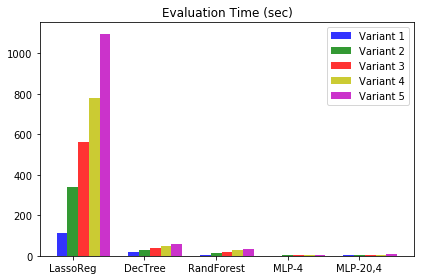

In [76]:
plot('Time Train', 'Evaluation Time (sec)')

### HITS@10

Compare average HITS@10 for all 5 variants.

In [99]:
print('Lasso HITS@10',df_lasso['HITS@10'].mean())
print('Decision tree HITS@10',df_tree['HITS@10'].mean())
print('RandomForest HITS@10',df_rf['HITS@10'].mean())
print('MLP(4) HITS@10',df_MLP1['HITS@10'].mean())
print('MLP(20,4) HITS@10',df_MLP2['HITS@10'].mean())

Lasso HITS@10 5.52
Decision tree HITS@10 6.44
RandomForest HITS@10 6.78
MLP(4) HITS@10 5.98
MLP(20,4) HITS@10 6.08


HITS@10 describes prediction accuracy of the model. The chart shows that the Random Forest (6.78) regressor achieves the prediction accuracy, closely followed by Decision Tree (6.44).

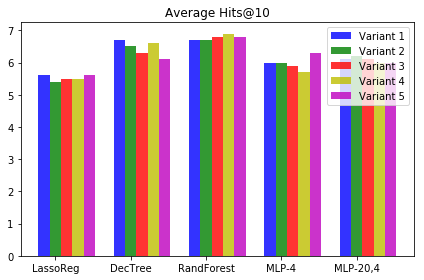

In [100]:
plot('HITS@10', 'Average Hits@10')

## AUC@10

Compare average AUC@10 for all 5 variants.

In [101]:
print('Lasso AUC@10',df_lasso['AUC@10'].mean())
print('Decision tree AUC@10',df_tree['AUC@10'].mean())
print('RandomForest AUC@10',df_rf['AUC@10'].mean())
print('MLP(4) AUC@10',df_MLP1['AUC@10'].mean())
print('MLP(20,4) AUC@10',df_MLP2['AUC@10'].mean())

Lasso AUC@10 0.5520000000000002
Decision tree AUC@10 0.644
RandomForest AUC@10 0.6780000000000003
MLP(4) AUC@10 0.5980000000000003
MLP(20,4) AUC@10 0.608


According to the Singh et al. (2015)'s paper, AUC@10 is calculated as:
$$\frac{Tp}{Tp+Fp} $$

Although the paper does not explain what is meant by true positives $Tp$ and false positives $Fp$, I understood it as follows. Given the top 10 posts (by the number of comments) predicted by the model, y_pred_10, and top 10 true posts, y_test_10:

* $Tp$ is the number of posts in y_pred_10 that are also in y_test_10: posts that the model __correctly__ predicted as being in top 10
* $Fp$ is the number of posts in y_pred_10 that are not in y_test_10: posts that the model __wrongly__ predicted as being in top 10
It shows the percentage of true positives among predicted values in the top 10 posts by the number of comments.

Here, as with HITS@10, Random Forest performed best and showed the highest percentage of correctly predicted values in the top 10, again closely followed by Decision Tree.

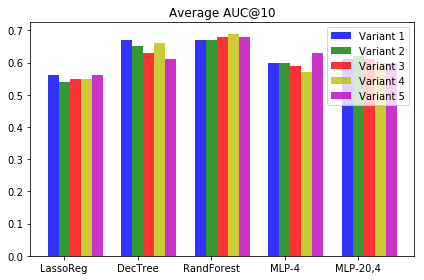

In [102]:
plot('AUC@10', 'Average AUC@10')

## MAE

Compare average MAE for all 5 variants.

In [103]:
print('Lasso MAE',df_lasso['MAE'].mean())
print('Decision tree MAE',df_tree['MAE'].mean())
print('RandomForest MAE',df_rf['MAE'].mean())
print('MLP(4) MAE',df_MLP1['MAE'].mean())
print('MLP(20,4) MAE',df_MLP2['MAE'].mean())

Lasso MAE 25.777535540800002
Decision tree MAE 22.598477213599995
RandomForest MAE 21.688791913799992
MLP(4) MAE 24.969180668499998
MLP(20,4) MAE 22.93703051493999


MAE stands for Mean Absolute Error of prediction by the models. Accordingly, lower scores indicate smaller errors and better results. The chart below shows that Random Forest has the lowest average error - 21.69. The next is Decision Tree - 22.60 and MLP(20,4) - 22.93 The highest error was observed in Lasso Regression - 25.78 and in MLP-4 and MLP-20,4 in variants 4 and 5:

In [106]:
print('MLP-4, variant 4:',df_MLP1_4['MAE'].mean())
print('MLP-4, variant 5:',df_MLP1_5['MAE'].mean())
print('MLP-20,4, variant 4:',df_MLP2_5['MAE'].mean())

MLP-4, variant 4: 29.991285334000004
MLP-4, variant 5: 27.9623539979
MLP-20,4, variant 4: 27.860090931500004


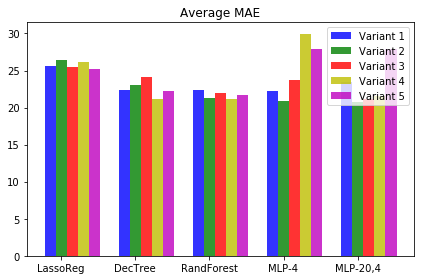

In [107]:
plot('MAE', 'Average MAE')

### Conclusion

This project revisited the results of the paper by Singh et al. (2015). I re-ran three methods that were employed by Singh et al.: Decision Tree, MLP-4 and MLP-20,4. Similarly to conclusions reached in that paper, I observed that Decision Tree produces more accurate predictions that both neural networks, MLP-4 and MLP-20,4.

In addition, using knowledge obtained during this course, I used Lasso Regression and Random Forest. The results show that Random Forest produces even highest accuracy than Decision Tree across all accuracy measures. It has also greater consistency across the 5 training sets: accuracy measures show smaller variance across the training sets compared to other regressors (see, e.g., the MAE chart).